# FIT5196 Assessment 2
#### Student Name: Prashasti Garg
#### Student ID: 31901611

Date: 08/02/2021

Version: 1.0

Environment: Python 3.7.9 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* `pandas` (for data manipulation and interpretation)
* `numpy` (for working in domain of linear algebra)
* `nltk` (for sentimental analyses of text)
* `math` (for solving mathematical functions)
* `matplotlib.pyplot` (for plotting the graphs)

## Importing Library

In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
import matplotlib.pyplot as plt

## DIRTY DATA

### Introduction
- The file has 16 columns, out of which coupon_discount, delivery_charges and the ordered quantity values in the shopping_cart attribute are always correct.
- Remaining columns thus can have anolamalies needs which needs to be investigated.
- Each row can only have one anomaly.

1. order_id          : A unique id for each order
2. customer_id       : A unique id for each customer
3. date              : The date the order was made, given in YYYY-MM-DD format
4. nearest_warehouse : A string denoting the name of the nearest warehouse to the customer
5. shopping_cart     : A list of tuples representing the order items: first element of the tuple is the item ordered, and the                          second element is the quantity ordered for such item.
6. order_price       : A float denoting the order price in AUD. The order price is the price of items before any discounts                            and/or delivery charges are applied.
7. delivery_charges  : A float representing the delivery charges of the order
8. customer_lat      : Latitude of the customer’s location
9. customer_long     : Longitude of the customer’s location
10. coupon_discount  : An integer denoting the percentage discount to be applied to the order_price
11. order_total      : A float denoting the total of the order in AUD after all discounts and/or delivery charges are applied.
12. season           : A string denoting the season in which the order was placed. Refer to this link for details about how                            seasons are defined
13. is_expedited_delivery : A boolean denoting whether the customer has requested an expedited delivery
14. distance_to_nearest_warehouse : A float representing the arc distance, in kilometres, between the customer and the nearest                                    warehouse to him/her (radius of earth: 6378 KM)
15. latest_customer_review : A string representing the latest customer review on his/her most recent order
16. is_happy_customer : A boolean denoting whether the customer is a happy customer or had an issue with his/her last order.


In [3]:
#dirty file is read using pandas
dirty_file= pd.read_csv(r'.\dirty_data.csv') 

In [13]:
#warehouse file is read using pandas
warehouse_file = pd.read_csv(r'.\warehouses.csv') 

In [5]:
#the conscise summary of dataframe in dirty file
dirty_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [6]:
#.describe() summarises the statistics pertaining to the DataFrame columns
dirty_file.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


- .describe() has shown that few column has an outlier ie, they are very distinctive to the other remaining values in a column.

In [7]:
dirty_file.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,494,285,5,469,8,500
top,ORD405547,ID0591274456,2019-10-16,Thompson,"[('iAssist Line', 1), ('Thunder line', 1)]",Spring,this was bought as a replacement for my wife's...
freq,1,2,5,193,3,133,1


- .describe(include=['O']) shows that nearest_warehouse and season column has 5 and 8 respectively unique values where they must have 3 and 4 respective values.

In [8]:
column_check = [False for i in range(len(dirty_file))]

### Correcting the dates
- Dates in the column date, needs to be investigated, it should be in the correct format with DD/MM/YYYY.
- date is first splitted with "-".
- Lastly, using string formatting, date is formatted into correct form.

In [63]:
xee

166

In [62]:
xee = 0
for i in column_check:
    if i == True:
        xee += 1

In [9]:
# dirty_file is iterated where i is the row number of file
for i, j in dirty_file.iterrows():
    # date in the file is splitted along "-"
    # date whose first indice is year is send through if and it would be formatted in correct form
    # date is formatted
    if  j['date'].split('-')[0] != '2019':
        defect_split = j['date'].replace(" ", "-").replace("/","-").split("-")
        # all the anomalies in the date column in corrected and stored in the column
        dirty_file.loc[i,"date"] = "{}-{}-{}".format(defect_split[2],defect_split[0],defect_split[1])
        column_check[i] = True

### Checking the season with respect to date
- Months specify different season:
 * `Spring` - September, October, November
 * `Summer` - December, January, February
 * `Autumn` - March, April, May
 * `Winter` - June, July, August
- In the season column, it needs to be investigated whether the season matches with its ccorresponding month.

In [14]:
for i, j in dirty_file.iterrows():
    date_split =  j['date'].split('-')
    # if condition for months who lie with the range of Spring season but has wrong season specified
    if int(date_split[1]) > 8 and int(date_split[1]) < 12 and j['season'].lower() != 'spring':
        dirty_file.loc[i,'season'] = 'Spring'
        column_check[i] = True
        
    # if condition for months who lie with the range of Summer season but has wrong season specified
    if (int(date_split[1]) < 3 or int(date_split[1]) == 12) and j['season'].lower() != 'summer':
        dirty_file.loc[i,'season'] = 'Summer'
        column_check[i] = True
        
    # if condition for months who lie with the range of Autumn season but has wrong season specified
    if int(date_split[1]) > 2 and int(date_split[1]) < 6 and j['season'].lower() != 'autumn':
        dirty_file.loc[i,'season'] = 'Autumn'
        column_check[i] = True
        
    # if condition for months who lie with the range of Winter season but has wrong season specified
    if int(date_split[1]) > 5 and int(date_split[1]) < 9 and j['season'].lower() != 'winter':
        dirty_file.loc[i,'season'] = 'Winter'
        column_check[i] = True
        

### Checking the values of season and warehouses
- Season and warehouse have limited values, it may include some anomaly.

In [15]:
#checkes the values in season column with their counts
dirty_file.season.value_counts()

Spring    137
Autumn    129
Summer    123
Winter    111
Name: season, dtype: int64

- In the above cell, we investigated that Season column has no anomaly.

In [16]:
dirty_file.nearest_warehouse.value_counts()

Thompson     193
Nickolson    181
Bakers       119
thompson       4
nickolson      3
Name: nearest_warehouse, dtype: int64

- nearest_warehouse has an anolamy in name of object, which needs to corrected.

In [17]:
dirty_file.nearest_warehouse.replace({'nickolson': 'Nickolson', 'thompson':'Thompson'}, inplace =True)

In [18]:
dirty_file.nearest_warehouse.value_counts()

Thompson     197
Nickolson    184
Bakers       119
Name: nearest_warehouse, dtype: int64

## Correcting the names of items in shopping_cart 
- In the shopping_cart, there are 10 items.
- We need to iterate through column to find the names of items are unique.
- We found that there are many case realted problem in names of shopping cart.

In [19]:
#using .replace() we replaced the case related problem in shopping_cart items
correct_items = {
    "ALCON 10": "Alcon 10",
    "CANDLE INFERNO": "Candle Inferno",
    "IASSIST LINE": "iAssist Line",
    "ISTREAM": "iStream",
    "LUCENT 330S": "Lucent 330S",
    "OLIVIA X460": "Olivia x460",
    "PEARTV": "pearTV",
    "THUNDER LINE": "Thunder line",
    "TOSHIKA 750": "Toshika 750",
    "universe note": "Universe Note",
    "alcon 10": "Alcon 10",
    "candle inferno": "Candle Inferno",
    "iassist line": "iAssist Line",
    "istream": "iStream",
    "lucent 330s": "Lucent 330S",
    "olivia x460": "Olivia x460",
    "peartv": "pearTV",
    "thunder line": "Thunder line",
    "toshika 750": "Toshika 750"
}

In [20]:
for i, j in dirty_file.iterrows():
    for x in correct_items.items():
        j.shopping_cart = j.shopping_cart.replace(x[0], x[1])
    dirty_file.loc[i, 'shopping_cart'] = j.shopping_cart

### Fixing the order_price

- The order_price is the total of all items with their ordered quantity.
- The value of order_price needs to investigated as the amount of each item is different, therefore using array matrix, price of each item can be found.
- Simultaneously, the order_price can be checked.
- The items in shopping_carthas limited values, that is 10. 

In [21]:
def getCart(cart):
    cart_list = []
    for i in cart.strip("[]").split(", ("):
        temp = i.strip("()").split(", ")
        item = temp[0].strip("''").lower()
        qty = int(temp[1])
        cart_list.append((item, qty))
    return np.array(cart_list)

In [22]:
item_list = []
for i, j in dirty_file.iterrows():
    items = getCart(j.shopping_cart)
    item_list += list(items[:,0])

In [23]:
item_set = set(item_list)

In [24]:
len(item_set)# item in shopping_cart is investigated  

10

In [25]:
# a dictionary is created to store the items and its corresponding quantity of each row
item_dict = {}
for i in item_set:
    item_dict[i] = 0 #initially value in dictionary is set as 0

In [26]:
item_dict

{'olivia x460': 0,
 'istream': 0,
 'alcon 10': 0,
 'candle inferno': 0,
 'iassist line': 0,
 'toshika 750': 0,
 'universe note': 0,
 'lucent 330s': 0,
 'thunder line': 0,
 'peartv': 0}

In [27]:
shopping_coeff = []
for i, j in dirty_file.iterrows():
    if column_check[i]:
        for x in item_dict:
            item_dict[x] = 0 #values in dictionary is emptied to iterate to next row
    
        items = getCart(j.shopping_cart)
            
        for x in items:
            item_dict[x[0]] = x[1] #quantity of items in shopping_cart of each row has been added in dictionary
        
        temp = list(item_dict.values()) #it consists of one row which contains the quantity
        temp.append(int(j.order_price)) # the order_price has been also added in matrix 
        shopping_coeff.append(temp)       

In [28]:
np_shopping = np.array(shopping_coeff, dtype="float64") #list is converted to np.array
np_shopping

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3320e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.7500e+03],
       [0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.2460e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        8.4900e+03],
       [0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        5.8900e+03],
       [0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        3.5205e+04],
       [2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.

In [29]:
x = np_shopping[:10, :10] #rows,column
x # only quantities

array([[0., 0., 0., 0., 0., 2., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 2., 1., 0., 0., 0., 2., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 2., 0., 0., 0., 0., 0., 1., 2., 0.],
       [0., 0., 2., 0., 1., 0., 0., 2., 0., 2.],
       [2., 0., 0., 0., 0., 0., 0., 0., 2., 2.],
       [0., 0., 2., 0., 1., 0., 0., 0., 0., 2.],
       [1., 0., 0., 0., 2., 0., 0., 0., 0., 2.],
       [0., 0., 0., 1., 2., 2., 0., 0., 0., 0.]])

In [30]:
x.shape

(10, 10)

In [31]:
y = np_shopping[:10, 10]
#only the order_price of each shopping_cart
y

array([13320.,  4750., 22460.,  8490.,  5890., 35205., 19430., 32745.,
       18295., 13520.])

In [32]:
y.shape

(10,)

In [33]:
sol = np.linalg.solve(x, y) #sparse matrix is solved
sol

array([1225.,  150., 8950.,  430., 2225., 4320., 3450., 1230., 2180.,
       6310.])

In [34]:
rounded = np.round(sol)

In [35]:
for i, k in enumerate(item_dict):
    item_dict[k] = rounded[i] # dictionary of all items in shopping_cart with their respective value of 1 quantity

In [36]:
for i, j in dirty_file.iterrows():
    order_price = 0
    items = getCart(j.shopping_cart)
    for item in items:
        order_price += int(item[1]) * item_dict[item[0]]
    # order_price calculated above if does not matches with the order_price of dirty_file, then update the value in file 
    if order_price != j.order_price:
        column_check[i] = True
        dirty_file.loc[i, 'order_price'] = order_price
            

### Checking the order_total
- order_total is the sum of order_price which may get reducted with coupon_discount.
- delivery_charges are added in the last after coupon_discount.
- Therefore, using an equation, order_total can be checked.

In [37]:
for i, j in dirty_file.iterrows():
    # equation to check the order_total
    price = round((j['order_price'] * ((100 - j['coupon_discount'])/100)) + j['delivery_charges'], 2)
    # whichever row in order_total doesnot match with the price calculated needs to updated
    if price != j['order_total']:        
        dirty_file.loc[i, 'order_total'] = price
        column_check[i] = True

###  Checking is_happy_customer
- is_happy_customer contains boolean value.
- It can be examed with the feedback of customers in latest_customer_review column.
- Using nltk.SentimentIntensityAnalyzer, values in is_happy_customer can be checked.
- The review with the polarity score of 'compound' of 0.05 or greater is considered True and remaining False.

In [38]:
senti = SentimentIntensityAnalyzer()

In [39]:
# examines the boolean value in is_happy_customer
dirty_file.is_happy_customer.value_counts()

True     359
False    141
Name: is_happy_customer, dtype: int64

In [40]:
for i, j in dirty_file.iterrows():
    review = j.latest_customer_review
    senti_review = senti.polarity_scores(review)
    temp = senti_review['compound']
    if temp >= 0.05 and j['is_happy_customer'] != True:
        dirty_file.loc[i,'is_happy_customer'] = True
        column_check[i] = True
    elif temp < 0.05 and j['is_happy_customer'] == True:
        dirty_file.loc[i,'is_happy_customer'] = False
        column_check[i] = True

In [41]:
dirty_file.is_happy_customer.value_counts()

True     362
False    138
Name: is_happy_customer, dtype: int64

### Checking the customer_lat
- customer_lat includes the latitude of the customer.
- The electronics store is situated in Melbourne, Australia. 
- Thus all the latitudes which fall ouside of the city needs to fixed.

- Dictionary is created which stores the latitude and longitude of the warehouse.

In [42]:
warehouse_latlong ={}
for i in range(len(warehouse_file)):  
    #name of the warehouse is the key and latitude and longitude are the values
    warehouse_latlong[warehouse_file.loc[i, 'names']] = (warehouse_file.loc[i, 'lat'], warehouse_file.loc[i, 'lon'])

- Checking whether the latitude of customer are negative or not.

In [43]:
for i,j in dirty_file.iterrows():
    j = dirty_file.loc[i]
    if j.customer_lat > 0:
        dirty_file.loc[i,'customer_lat'] = -1 * j.customer_lat
        column_check[i] = True       

- Using boxplot to find the outliers.

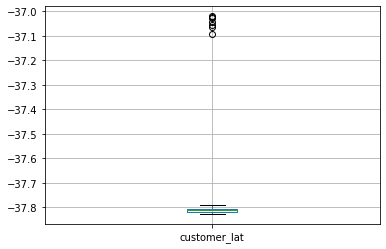

In [44]:
%matplotlib inline
bp = dirty_file.boxplot(column = 'customer_lat')

- Finding out the rows whose latitudes have anomaly.

In [45]:
i_lat = []
for i,j in dirty_file.iterrows():
    m = j.customer_lat
    if not (m <= -37.79 and m >= -37.84):
        i_lat.append(i)
        column_check[i] = True       

In [46]:
def haversine_lat(dist, lon1, lat2, lon2):
    # lat2, lon2 = warehouse's coordinates
    radius = 6378
    
    a = -0.5 * math.sin(math.radians(lat2))
    b = (math.sin(math.radians(lon2-lon1)/2) ** 2 - 0.5) * math.cos(math.radians(lat2))
    x_squa = math.tan(dist / radius / 2) ** 2
    phi = math.atan2(b,a)
    A = math.sqrt(a **2 + b**2)
    
    s1 = round((-phi - math.asin(((x_squa / (1 - x_squa)) - 0.5) / A) - math.pi) / math.pi * 180, 7)
    s2 = round((-phi + math.asin(((x_squa / (1 - x_squa)) - 0.5)/A)) / math.pi * 180 , 7)
    return s1,s2

In [47]:
for i,j in dirty_file.iterrows():
    if i in i_lat:
        j = dirty_file.loc[i]
        lat_cal = haversine_lat(j.distance_to_nearest_warehouse, j.customer_long, warehouse_latlong[j.nearest_warehouse][0], warehouse_latlong[j.nearest_warehouse][1])
        if j['customer_lat'] != lat_cal[0] and j['customer_lat'] != lat_cal[1]:
            dirty_file.loc[i, 'customer_lat'] = round(lat_cal[0],7)

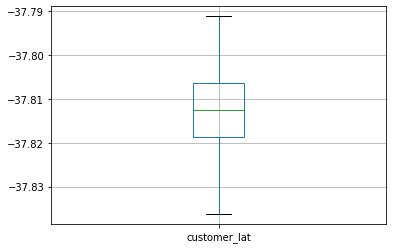

In [48]:
%matplotlib inline
bp = dirty_file.boxplot(column = 'customer_lat')

- Now there is no outlier in boxplot.

<AxesSubplot:>

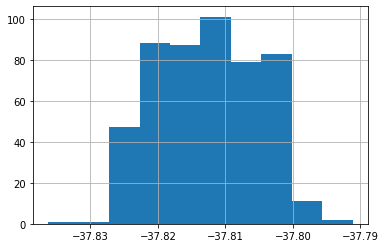

In [49]:
%matplotlib inline
dirty_file['customer_lat'].hist()

### Checking the customer_long
- We need to find the anomalies in customer_long.
- The electonic shope is situated in Melbourne, Australia.
- Thus all latitudes which fall outside of the city needs to be fixed.

- Finding the outliers in longitudes.

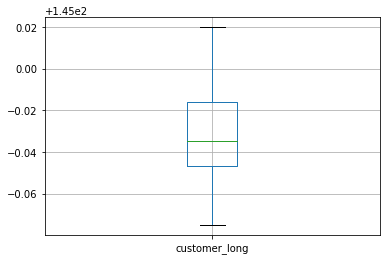

In [50]:
%matplotlib inline
bp = dirty_file.boxplot(column = 'customer_long')

- Finding out the indices of row which have anomaly in customer_latitude.

In [51]:
i_lon = []
for i,j in dirty_file.iterrows():
    m = j.customer_long
    if not (m >= 144.93 and m <= 145.1):
        i_lon.append(i)
        column_check[i] = True       

In [52]:
def haversine_lon(dist, lat1, lat2, lon2):
    #lat1, lon2 = customer's coordinates
    # lat2, lon2 = warehouse's coordinates
    radius = 6378
    
    x_squa = math.tan(dist / radius / 2) ** 2
    top = x_squa * ((x_squa / (1 + x_squa) - math.sin(math.radians(lat1 - lat2) / 2) ** 2) ** 2)
    bot = math.cos(math.radians(lat2)) * math.cos(math.radians(lat1))
    
    s1 = round(2 * math.asin(math.sqrt(top/bot)) / math.pi * 180 + lon2, 7)
    s2 = round(2 * math.asin(- math.sqrt(top/bot)) / math.pi * 180 + lon2, 7)
    
    return s1, s2  

In [53]:
for i,j in dirty_file.iterrows():
    if i in i_lon:
        j = dirty_file.loc[i]
        lon_cal = haversine_lon(j.distance_to_nearest_warehouse, j.customer_lat, warehouse_latlong[j.nearest_warehouse][0], warehouse_latlong[j.nearest_warehouse][1])
        if j['customer_long'] != lon_cal[0] and j['customer_long'] != lon_cal[1]:
            dirty_file.loc[i, 'customer_long'] = round(lon_cal[0],7)
            

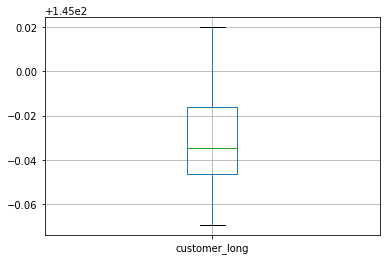

In [54]:
%matplotlib inline
bp = dirty_file.boxplot(column = 'customer_long')

<AxesSubplot:>

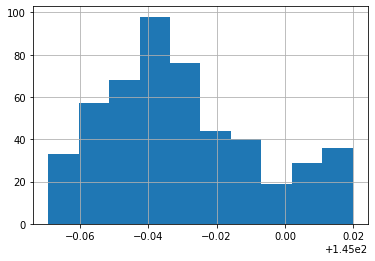

In [55]:
%matplotlib inline
dirty_file['customer_long'].hist()

### Checking the distance_to_nearest_warehouse
- In this column, we need to find the distance with each warehouse in order to find the nearest warehouse to the customer.
- The distance_to_neraest_warehouse will them need to be fixed.

In [56]:
def haversine_distance(lat1, lon1, lat2, lon2):
    radius_of_earth = 6378

    cust_lat = math.radians(lat1)
    cust_long = math.radians(lon1)
    warehouse_lat = math.radians(lat2)
    warehouse_long = math.radians(lon2)

    dlat = cust_lat - warehouse_lat
    dlon = cust_long - warehouse_long

    a = math.sin(dlat / 2)**2 + math.cos(cust_lat) * math.cos(warehouse_lat) * math.sin(dlon / 2)**2
    distance = radius_of_earth * (2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))) 
    
    return round(distance,4)

In [64]:
warehouse_latlong

{'Nickolson': (-37.818595, 144.969551),
 'Thompson': (-37.8126732, 144.9470689),
 'Bakers': (-37.8099961, 144.99523200000004)}

In [57]:
for i, j in dirty_file.iterrows():
    #to store the minimum value, therefore infinity is stored, which is greater than all
    minDistance = math.inf
    nearestWarehouse = math.inf
    for warehouse in warehouse_latlong:
        distance = haversine_distance(j.customer_lat, j.customer_long, warehouse_latlong[warehouse][0], warehouse_latlong[warehouse][1])
        if distance < minDistance:
            minDistance = distance
            nearestWarehouse = warehouse            
    if minDistance < j.distance_to_nearest_warehouse and j.nearest_warehouse == nearestWarehouse:
        dirty_file.loc[i, 'distance_to_nearest_warehouse'] = distance
        column_check[i] = True  

<AxesSubplot:>

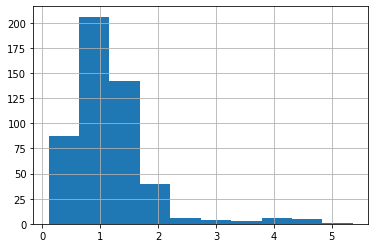

In [58]:
%matplotlib inline
dirty_file['distance_to_nearest_warehouse'].hist()

In [59]:
dirty_file.loc[94, 'distance_to_nearest_warehouse']

1.418

In [60]:
dirty_file['distance_to_nearest_warehouse'].describe()

count    500.000000
mean       1.173904
std        0.740542
min        0.107800
25%        0.756250
50%        1.040500
75%        1.422075
max        5.366100
Name: distance_to_nearest_warehouse, dtype: float64

### Checking the nearest_warehouse
- nearest_warehouse column needs to check the warehouse name corresponding to the distance.
- Therefore, all the values which have anomaly needs to be fixed.

In [61]:
for i,j in dirty_file.iterrows():
        j = dirty_file.loc[i]
        for warehouse in warehouse_latlong:
            distance = haversine_distance(j.customer_lat, j.customer_long, warehouse_latlong[warehouse][0], warehouse_latlong[warehouse][1])
            if j.distance_to_nearest_warehouse == distance and j.nearest_warehouse != warehouse:
                dirty_file.loc[i,'nearest_warehouse'] = warehouse
                column_check[i] = True 
                break        
        

In [ ]:
dirty_file.to_csv(r'./31901611_dirty_data_solution.csv', index = False)

## Reference

- For finding the seasons of Australia all over the year.
 * [http://www.bom.gov.au/climate/glossary/seasons.shtml]
- For finding the haversine distance formula to calculalte distance_to_nearest_warehouse.
 * [https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points]
- For finding the latitude and longitude of Melbourne, Austrlaia.
 * [https://en.wikipedia.org/wiki/Module:Location_map/data/Australia_Victoria_Melbourne_metropolitan_area_complete]
 * [https://www.google.com/search?q=melbourne+latitude+and+longitude+range&oq=me&aqs=chrome.2.69i59l3j69i57j69i60l2j69i61j69i65.1753j0j7&sourceid=chrome&ie=UTF-8]
- For solving the "math domain error".
 * [https://stackoverflow.com/questions/15890503/valueerror-math-domain-error]
- For understanding the boxplot.
 * [https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51]

## Summary

In the dirty_data.csv, it included some syntactic and semantic anomalies, which has been fixed. Also a new 31901611_dirty_data_solution.csv has been created which does not have any anomaly.

## MISSING DATA

## Introduction

missing_data.csv has 16 columns. It has missing values in some column, which is called as Coverage Anomaly. We need to  investigate the file in order to find the columns which has anomaly.

1. order_id          : A unique id for each order
2. customer_id       : A unique id for each customer
3. date              : The date the order was made, given in YYYY-MM-DD format
4. nearest_warehouse : A string denoting the name of the nearest warehouse to the customer
5. shopping_cart     : A list of tuples representing the order items: first element of the tuple is the item ordered, and the                          second element is the quantity ordered for such item.
6. order_price       : A float denoting the order price in AUD. The order price is the price of items before any discounts                            and/or delivery charges are applied.
7. delivery_charges  : A float representing the delivery charges of the order
8. customer_lat      : Latitude of the customer’s location
9. customer_long     : Longitude of the customer’s location
10. coupon_discount  : An integer denoting the percentage discount to be applied to the order_price
11. order_total      : A float denoting the total of the order in AUD after all discounts and/or delivery charges are applied.
12. season           : A string denoting the season in which the order was placed. Refer to this link for details about how                            seasons are defined
13. is_expedited_delivery : A boolean denoting whether the customer has requested an expedited delivery
14. distance_to_nearest_warehouse : A float representing the arc distance, in kilometres, between the customer and the nearest                                    warehouse to him/her (radius of earth: 6378 KM)
15. latest_customer_review : A string representing the latest customer review on his/her most recent order
16. is_happy_customer : A boolean denoting whether the customer is a happy customer or had an issue with his/her last order.


In [ ]:
missing_file = pd.read_csv(r'.\missing_data.csv') 

In [ ]:
# .head() displays the first five rows of the file
missing_file.head()

- We need to calculate the number of missing values in each column. Thus .isnull().sum() gives the sum of all null values in every column

In [ ]:
missing_file.isnull().sum()

- missing_file has 8 columns which includes 10 missing values each.

### Imputing the missing values in season column
- The missing_file includes 10 missing values in season column.
- Months specify different season:
 * `Spring` - September, October, November
 * `Summer` - December, January, February
 * `Autumn` - March, April, May
 * `Winter` - June, July, August
 - By maping the month in date column with the season mentioned above, can we impute the missing value in season column. 

In [ ]:
missing_file.season.value_counts()

In [ ]:
# finding all the indices of the row which has missing value in season column
null_season = missing_file[missing_file['season'].isnull()].index.tolist()

In [ ]:
for i in null_season:
    j = missing_file.loc[i]
    # date is split to find the month which will be mapped to find the season
    date_split =  j['date'].split('-')
    
    #if the specified moth falls under the section of particular season, the missing value will be imputed
    if int(date_split[1]) > 8 and int(date_split[1]) < 12:
        missing_file.loc[i,'season'] = 'Spring'
        
    if int(date_split[1]) < 3 or int(date_split[1]) == 12: 
        missing_file.loc[i,'season'] = 'Summer'
            
    if int(date_split[1]) > 2 and int(date_split[1]) < 6:
        missing_file.loc[i,'season'] = 'Autumn'
            
    if int(date_split[1]) > 5 and int(date_split[1]) < 9: 
        missing_file.loc[i,'season'] = 'Winter'
            
    

In [ ]:
missing_file.season.value_counts()

In [ ]:
missing_file.season.isnull().sum()

In [ ]:
%matplotlib inline
missing_file['season'].hist()

### Imputing the missing values in nearest_warehouse
- nearest_warehouse has 10 missing values.
- By finding the distance between customer's coordinated and warehouse's coordinates, nearest_warehouse can be imputed.

In [ ]:
missing_file.nearest_warehouse.value_counts()

In [ ]:
# finding the rows of the column which has missing values.
null_warehouse = missing_file[missing_file['nearest_warehouse'].isnull()].index.tolist()

In [ ]:
for i in null_warehouse:
    j = missing_file.loc[i]
    for warehouse in warehouse_latlong:
            #finding the distance using customer_lat, customer_long and warehouse's lat amd warehouse'lon
            distance = haversine_distance(j.customer_lat, j.customer_long, warehouse_latlong[warehouse][0], warehouse_latlong[warehouse][1])
            #if calculated distance matches with the distance_to_nearest_warehouse, value will be imputed in nearest_warehouse
            if j.distance_to_nearest_warehouse == distance:
                missing_file.loc[i,'nearest_warehouse'] = warehouse
                break        

In [ ]:
#checking the count of each warehouse
missing_file.nearest_warehouse.value_counts()

In [ ]:
%matplotlib inline
missing_file['nearest_warehouse'].hist()

In [ ]:
#checking the null values in this column
missing_file.nearest_warehouse.isnull().sum()

### Imputing the missing values of distance_to_nearest_warehouse
- distance_to_nearest_warehouse contains 10 missing values.
- Using the nearest_warehouse, can we get the warehouse which is close to the customer, and then using the coordinates of customer and warehouse we can find the distance using haversine distance which has been defined above as haversine_distance.

In [ ]:
# finding the indices of row which has missing values in distance_to_nearest_warehouse column
null_distance = missing_file[missing_file['distance_to_nearest_warehouse'].isnull()].index.tolist()

In [ ]:
for i in null_distance:
    j = missing_file.loc[i]
    #finding the distance using customer_lat, customer_long and warehouse's lat amd warehouse'lon
    distance_calulate = haversine_distance(j.customer_lat, j.customer_long, warehouse_latlong[j.nearest_warehouse][0], warehouse_latlong[j.nearest_warehouse][1])
    missing_file.loc[i, 'distance_to_nearest_warehouse'] = distance_calulate

In [ ]:
%matplotlib inline
missing_file['distance_to_nearest_warehouse'].hist()

In [ ]:
#checking the null values in this column
missing_file.distance_to_nearest_warehouse.isnull().sum()

### Imputing the missing values of customer_lat
- customer_lat column has 10 missing values.
- Using a formula which has defined under haversine_lat is called to find the customer_lat.
- It requires the distance between customer and warehouse which is defined by distance_to_nearest_warehouse.

In [ ]:
def haversine_lat(dist,lon1,lat2,lon2):
    #dist = distance_to_nearest_warehouse
    #lat1,lat2 = customer's coordinates
    #lat2, lon2 = warehouse's coordinates
    
    radius = 6378 #Km
    
    a = -0.5 * math.sin(math.radians(lat2))
    b = (math.sin(math.radians(lon1-lon2)/2) ** 2 - 0.5) * math.cos(math.radians(lat2))
    x_squa = math.tan(dist / radius / 2) ** 2
    phi = math.atan2(b,a) #radius
    A = math.sqrt(a **2 + b**2)
    
    s1 = round((-phi - math.asin(((x_squa / (1 - x_squa)) - 0.5) / A) - math.pi) / math.pi * 180, 7)
    s2 = round((-phi + math.asin(((x_squa / (1 - x_squa)) - 0.5) / A)) / math.pi * 180 , 7)
    return s1,s2

In [ ]:
#finding the indices of row which has missing value for customer_lat.
null_lat = missing_file[missing_file['customer_lat'].isnull()].index.tolist()

In [ ]:
for i in null_lat:
    j = missing_file.loc[i]
    #finding the customer_lat using distance_to_nearest_warehouse, customer_long, warehouse's lat, warehouse's lon
    lat_cal = haversine_lat(j.distance_to_nearest_warehouse, j.customer_long, warehouse_latlong[j.nearest_warehouse][0], warehouse_latlong[j.nearest_warehouse][1])
    missing_file.loc[i, 'customer_lat'] = lat_cal[0]

In [ ]:
%matplotlib inline
bp = missing_file.boxplot(column = 'customer_lat')

In [ ]:
#checking the missing values in this column
missing_file.customer_lat.isnull().sum()

### Imputing the missing values of customer_long
- customer_long has 10 missing values.
- Using the formula whic has been defined under haversine_lon, we can impute the missing values for customer_lon.
- It requires the distance bettwen customer and warehouse which has been defined by distance_to_nearest_warehouse.

In [ ]:
def haversine_lon(dist, lat1, lat2, lon2):
    #lat1, lon2 = customer's coordinates
    # lat2, lon2 = warehouse's coordinates
    radius = 6378
    
    x_squa = math.tan(dist / radius / 2) ** 2
    top = x_squa * ((x_squa / (1 + x_squa) - math.sin(math.radians(lat1 - lat2) / 2) ** 2) ** 2)
    bot = math.cos(math.radians(lat2)) * math.cos(math.radians(lat1))
    
    s1 = round(2 * math.asin(math.sqrt(top/bot)) / math.pi * 180 + lon2, 7)
    s2 = round(2 * math.asin(- math.sqrt(top/bot)) / math.pi * 180 + lon2, 7)
    
    return s1, s2   

In [ ]:
#finding the indices of row which has missing values in customer_long column
null_lon = missing_file[missing_file['customer_long'].isnull()].index.tolist()

In [ ]:
for i in null_lon:
    j = missing_file.loc[i]
    #finding the customer_lon using distance-to_nearest_warehouse, customer_lat, warehouse's lat, warehouse's lon
    lon_cal = haversine_lon(j.distance_to_nearest_warehouse, j.customer_lat, warehouse_latlong[j.nearest_warehouse][0], warehouse_latlong[j.nearest_warehouse][1])
    missing_file.loc[i, "customer_long"] = lon_cal[0]

In [ ]:
%matplotlib inline
bp = missing_file.boxplot(column = 'customer_long')

In [ ]:
#checking the missing values in this column
missing_file.customer_long.isnull().sum()

### Imputing the missing values of order_price
- order_price has 10 missing values.
- order_price is dependent upon order_total, delivery_charges and coupon_discount.
- By formulating an equation, we can impute the missing values for order_price.

In [ ]:
missing_file.order_price.isnull().sum()

In [ ]:
#finding the indices of row which has missing values in order_price column
null_price = missing_file[missing_file['order_price'].isnull()].index.tolist()

In [ ]:
for i in null_price:
    j = missing_file.loc[i]
    price = (j['order_total'] + j['delivery_charges']) / ((100 - j['coupon_discount'])/100) 
    missing_file.loc[i, 'order_price'] = price
           

In [ ]:
%matplotlib inline
missing_file['order_price'].hist()

In [ ]:
#checking the missing values in this column
missing_file.order_price.isnull().sum()

### Imputing the missing values of order_total
- order_total has 10 missing values.
- order_total depends upon order_price which may be discounted using coupon_discount and then delivery_charges are added in the end.

In [ ]:
missing_file.order_total.isnull().sum()

In [ ]:
#finding the indices of row which has missing values in order_total column
null_total = missing_file[missing_file['order_total'].isnull()].index.tolist()

In [ ]:
for i in null_total:
    j = missing_file.loc[i]
    price = (j['order_price']  * ((100 - j['coupon_discount'])/100)) + j['delivery_charges']
    missing_file.loc[i, 'order_total'] = price

In [ ]:
%matplotlib inline
missing_file['order_total'].hist()

In [ ]:
#checking the missing values in this column
missing_file.order_total.isnull().sum()

### Imputing the values of is_happy_customer
- is_happy_customer has 10 missing values.
- Using nltk library's, SentimentIntensityAnalyzer tool we can interpret the text and find its polarity, which are positive, negative, neutral and compound.
- In the texts, whose compound value is more than and equal to "0.05" is considered True and remaining False.

In [ ]:
#finding the indices of row which has missing values in is_happy_customer column
null_val = missing_file[missing_file['is_happy_customer'].isnull()].index.tolist()

In [ ]:
senti = SentimentIntensityAnalyzer()

In [ ]:
for i in null_val:
    j = missing_file.loc[i]
    review = j.latest_customer_review
    senti_review = senti.polarity_scores(review)
    temp = senti_review['compound']
    if temp >= 0.05:
        missing_file.loc[i,'is_happy_customer'] = True
    elif temp < 0.05:
        missing_file.loc[i,'is_happy_customer'] = False

In [ ]:
missing_file.is_happy_customer.value_counts()

In [ ]:
#checking the missing values in this column
missing_file.is_happy_customer.isnull().sum()

In [ ]:
#checking the missing values in this file
missing_file.isnull().sum()

In [ ]:
missing_file.to_csv(r'./31901611_missing_data_solution.csv', index = False)

## Summary

In the missing_data.csv, it included the coverage anomaly in eight columns. The columns in the file depend upon each other. With that inter-dependency, values has been imputed in missing columns. And a new 31901611_missing_data_solution.csv has been created.